# Classification Problems

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Logistic Regression

## Model 

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

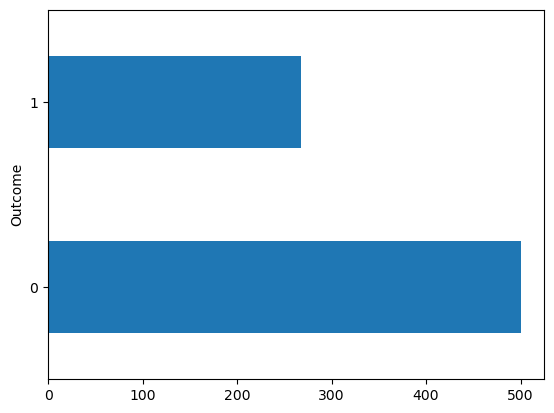

In [5]:
df["Outcome"].value_counts().plot.barh();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [13]:
# StatsModel

In [22]:
loj = sm.Logit(y, X)

In [26]:
loj_model = loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [27]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                 0.05922
Time:                        16:34:32   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [28]:
# ScikitLearn

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
loj = LogisticRegression(solver="liblinear")

In [31]:
loj_model = loj.fit(X, y)

In [32]:
loj_model.intercept_

array([-5.88679617])

In [33]:
loj_model.coef_

array([[ 1.16994476e-01,  2.83733435e-02, -1.68981359e-02,
         7.55145090e-04, -6.41407258e-04,  5.97201268e-02,
         6.76128123e-01,  7.23498971e-03]])

## Model Optimization & Fine-Tuning

In [34]:
y_pred = loj_model.predict(X)

In [35]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [45]:
accuracy_score(y, y_pred)

0.7747395833333334

In [37]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [38]:
loj_model.predict(X)[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [39]:
loj_model.predict_proba(X)[0:10]

array([[0.3505852 , 0.6494148 ],
       [0.91692518, 0.08307482],
       [0.22489628, 0.77510372],
       [0.92127453, 0.07872547],
       [0.16759435, 0.83240565],
       [0.79886109, 0.20113891],
       [0.8800353 , 0.1199647 ],
       [0.27795677, 0.72204323],
       [0.32053464, 0.67946536],
       [0.92264521, 0.07735479]])

In [40]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [41]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [43]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs] 

In [44]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [46]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [47]:
accuracy_score(y, y_pred)

0.7747395833333334

In [48]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



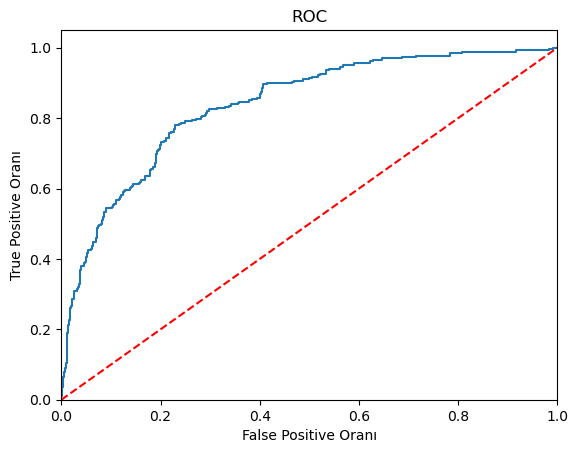

In [49]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
loj = LogisticRegression(solver="liblinear")
loj_model= loj.fit(X_train,y_train)

In [55]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7447916666666666

In [58]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7397368421052632

# Gaussian Naive Bayes

In [78]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
nb = GaussianNB()

In [72]:
nb_model = nb.fit(X_train, y_train)

In [73]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [74]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [75]:
y_pred = nb_model.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [77]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

## Model Optimization & Fine-Tuning

In [80]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [82]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [83]:
y_pred = knn_model.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [85]:
cross_val_score(knn_model, X_test, y_test, cv = 10).mean()

0.6755434782608696

In [86]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [87]:
knn = KNeighborsClassifier()

In [89]:
knn_cv = GridSearchCV(knn , knn_params, cv=10)

In [92]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [93]:
print("best score:" + str(knn_cv.best_score_))
print("best parameters:" + str(knn_cv.best_params_))

best score:0.748637316561845
best parameters:{'n_neighbors': 11}


In [94]:
knn = KNeighborsClassifier(11)

In [95]:
knn_tuned = knn_cv.fit(X_train, y_train)

In [96]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [99]:
y_pred = knn_tuned.predict(X_test)

In [100]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVM (Support Vector Machine's)

In [101]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [103]:
svm_model = SVC(kernel="linear").fit(X_train,y_train)

In [104]:
y_pred = svm_model.predict(X_test)

In [105]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [106]:
cross_val_score(knn_model, X_test, y_test, cv = 10).mean()

0.6755434782608696

## Model Optimization & Fine-Tuning


In [107]:
svc_params = {"C": np.arange(1,10)}
svc = SVC(kernel="linear")

In [108]:
svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs=-1,verbose=2)

In [109]:
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [110]:
print("best parameters:" + str(svc_cv_model.best_params_))

best parameters:{'C': 5}


In [111]:
svc_tuned = SVC(kernel="linear", C=5).fit(X_train,y_train)

In [112]:
y_pred = svc_tuned.predict(X_test)

In [113]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC (Non-Linear SVC)

When SVC() is called, if no kernel parameter is specified, the “rbf” kernel is used by default.

In [120]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [121]:
svc_model = SVC().fit(X_train,y_train)

In [122]:
y_pred = svc_model.predict(X_test)

In [123]:
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Optimization & Fine-Tuning


In [124]:
svc_params = {"C": [0.0001, 0.001, 0.1,1,5,10,50,100],
             "gamma": [0.0001, 0.001, 0.1,1,5,10,50,100]}

In [125]:
svc = SVC()

In [126]:
svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs=-1,verbose=2)

In [127]:
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [128]:
print("best parameters:" + str(svc_cv_model.best_params_))

best parameters:{'C': 10, 'gamma': 0.0001}


In [132]:
svc_tuned = SVC(C=10, gamma=0.0001).fit(X_train, y_train)

In [133]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Artificial Neural Networks (ANN)

In [140]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()

In [143]:
X_train_scaled = scaler.fit_transform(X_train)

In [144]:
X_test_scaled = scaler.transform(X_test)

In [145]:
from sklearn.neural_network import MLPClassifier

In [147]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [149]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7186147186147186

## Model Optimization & Fine-Tuning


In [154]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5),
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [155]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                         cv = 10,
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [181]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [190]:
mlpc_tuned = MLPClassifier(activation="relu",
                          alpha=0.0001,
                          hidden_layer_sizes=(100, 100, 100),
                          solver="sgd",
                          random_state=42)

In [191]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=42, solver='sgd')

In [192]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7575757575757576

#  CART (Classification and Regression Trees)

In [215]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X= pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [218]:
from skompiler import skompile

In [219]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[6] <= 0.39149999618530273 else 1) if x[5] <=
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 0 if x[3] <= 14.5 else 1) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (1 if x[5] <= 24.0 else 0) if x[2] <= 73.0 else
    0) if x[2] <= 94.0 else 1 if x[2] <= 97.0 else 0) if x[5] <= 
    26.949999809265137 else (1 if x

In [220]:
x = [7]
(((0 if x[0] <= 0.5 else 0 if x[0] <= 1.5 else 0) if x[0] <= 2.5 else ((0 if
    x[0] <= 3.5 else 0) if x[0] <= 4.5 else 0) if x[0] <= 5.5 else 0) if x[
    0] <= 6.5 else (((1 if x[0] <= 7.5 else 1) if x[0] <= 8.5 else 1) if x[
    0] <= 9.5 else 0 if x[0] <= 10.5 else 1 if x[0] <= 11.5 else 0 if x[0] <=
    12.5 else 0) if x[0] <= 13.5 else 1)

1

In [221]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

## Model Optimization & Fine-Tuning


In [222]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\frkng\.conda\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
 

In [225]:
cart_params = {"max_depth": range(1,10),
              "min_samples_split": list(range(2,50))}

In [228]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_params, cv = 10, n_jobs=-1, verbose = 2)
cart_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [229]:
print("En iyi parametreler: " + str(cart_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [230]:
cart = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=19)

In [231]:
cart_tuned = cart.fit(X_train, y_train)

In [232]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# RF (Random Forests)

In [233]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X= pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Model Optimization & Fine-Tuning


In [237]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\frkng\.conda\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", 

In [238]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],              # Ağaç derinliği (None: sınırsız)
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],                # Yaprak düğümde bulunması gereken minimum örnek sayısı
    'max_features': ['auto', 'sqrt', 'log2']      # Her bölünmede dikkate alınacak özellik sayısı
}

In [ ]:
rf_cv_model = GridSearchCV(estimator=rf_model,
                           param_grid=rf_params,
                           cv=5,   
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

In [245]:
rf_cv_model.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


NameError: name 'grid_search' is not defined

In [246]:
print("best parameters:", rf_cv_model.best_params_)
print("best cv score:", rf_cv_model.best_score_)

best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
best cv score: 0.7932848736587054


In [247]:
rf_tuned = rf_cv_model.best_estimator_ # or you can enter the parameters manually by typing RandomForestClassifier()
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [248]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Variable Significance Levels')

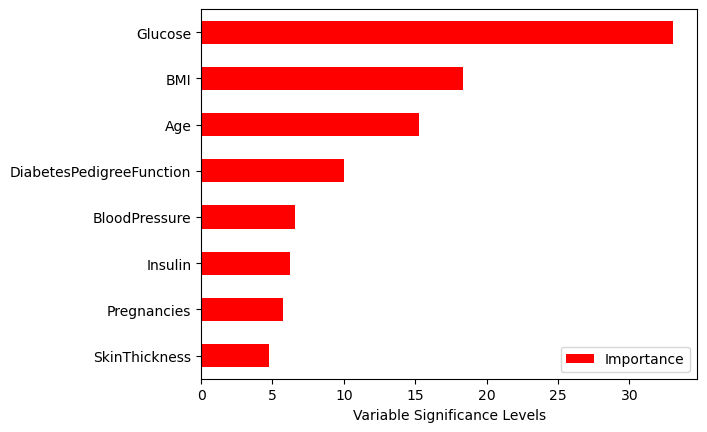

In [250]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

 # (GBM) Gradient Boosting Machines

In [253]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X= pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [254]:
from sklearn.ensemble import GradientBoostingClassifier

In [258]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [259]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Optimization & Fine-Tuning


In [263]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\frkng\.conda\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'log_loss', 'exponential'}, default='log_loss'
    The loss function to be optimized. 'log_loss' refers to binomial and
    multinomial deviance, the same as u

In [264]:
gbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [266]:
gbm_cv_model = GridSearchCV(estimator=gbm_model,
                           param_grid=gbm_params,
                           cv=10,   
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

In [267]:
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [268]:

print("best parameters:", gbm_cv_model.best_params_)
print("best cv score:", gbm_cv_model.best_score_)

best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 300, 'subsample': 0.8}
best cv score: 0.787561146051712


In [269]:
gbm_tuned = gbm_cv_model.best_estimator_ # or you can enter the parameters manually by typing GradientBoostingClassifier()
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

#  XGBoost

In [270]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X= pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [271]:
#!pip install xgboost
from xgboost import XGBClassifier

In [272]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [273]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Optimization & Fine-Tuning


In [274]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [276]:
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [277]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [278]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [279]:
xgb = XGBClassifier(learning_rate = 0.05,
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 1.0)

In [280]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [281]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

# LightGBM

In [282]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [283]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [284]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [285]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Optimization & Fine-Tuning

In [286]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [288]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2)

In [289]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [291]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [292]:
lgbm = LGBMClassifier(learning_rate = 0.05,
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 20)

In [293]:
lgbm_tuned = lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [294]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# CatBoost

In [295]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [296]:
#!pip install catboost
from catboost import CatBoostClassifier

In [297]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 160ms	remaining: 2m 40s
1:	learn: 0.6843414	total: 170ms	remaining: 1m 24s
2:	learn: 0.6805760	total: 179ms	remaining: 59.4s
3:	learn: 0.6765782	total: 190ms	remaining: 47.4s
4:	learn: 0.6720829	total: 200ms	remaining: 39.8s
5:	learn: 0.6681617	total: 211ms	remaining: 35s
6:	learn: 0.6641912	total: 223ms	remaining: 31.6s
7:	learn: 0.6602881	total: 233ms	remaining: 28.9s
8:	learn: 0.6562626	total: 241ms	remaining: 26.5s
9:	learn: 0.6528483	total: 247ms	remaining: 24.4s
10:	learn: 0.6487823	total: 253ms	remaining: 22.7s
11:	learn: 0.6454980	total: 257ms	remaining: 21.2s
12:	learn: 0.6418953	total: 261ms	remaining: 19.8s
13:	learn: 0.6374431	total: 265ms	remaining: 18.7s
14:	learn: 0.6339676	total: 268ms	remaining: 17.6s
15:	learn: 0.6304252	total: 271ms	remaining: 16.7s
16:	learn: 0.6266998	total: 274ms	remaining: 15.8s
17:	learn: 0.6237660	total: 276ms	remaining: 15.1s
18:	learn: 0.6204394	total: 279ms	remaining: 14.4s
19:	learn: 0.

In [298]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [290]:
## Model Optimization & Fine-Tuning


In [299]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [300]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb = CatBoostClassifier(iterations = 200,
                          learning_rate = 0.05,
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

In [ ]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# comparison of all models

In [302]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned

]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
GridSearchCV:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 74.8918%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 34.6320%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 74.4589%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.4589%
----------------------------
LGBMClassifier:
Accuracy: 74.8918%
----------------------------
XGBClassifier:
Accuracy: 76.6234%


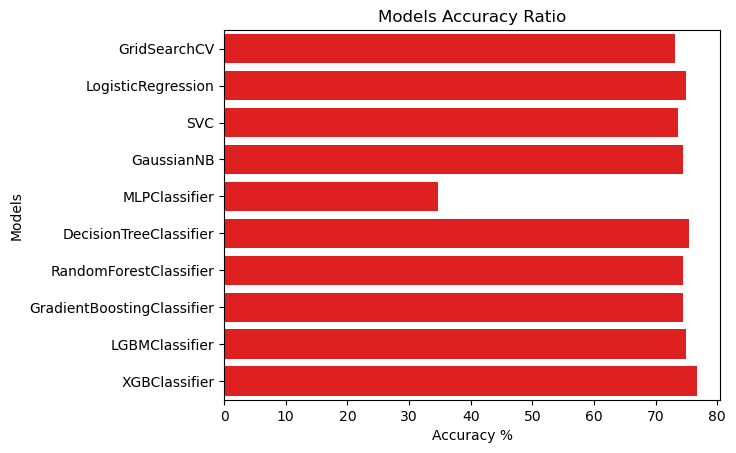

In [306]:
acc = []

all_acc = pd.DataFrame(columns= ["Models","Accuracy"])

for model in modeller:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    all_acc = pd.concat([all_acc, result], ignore_index=True)



sns.barplot(x= 'Accuracy', y = 'Models', data=all_acc, color="r")
plt.xlabel('Accuracy %')
plt.title('Models Accuracy Ratio');